In [1]:
%matplotlib inline
from tools import *

# Ch04 数据表示与特征工程

-   连续特征 ( Continuous Feature ) 。
-   分类特征 ( Categorical Feature ) ，也叫离散特征 ( Discrete Feature ) 。

特征工程：找到最佳的数据表示。

虽然神经网络已经可以自动完成特征的选择和变换，但是深入学习特征变换的原理，可以帮助理解神经网络对数据进行了哪种变化，从而加深对数据的理解，能够更加显式地操纵数据变换过程，提高数据变换的效率和加入更多的先验信息。

## 4.2 分箱、离散化、线性模型与树

特征分箱，也叫离散化，可以使线性模型在处理连续数据时的效果更好。

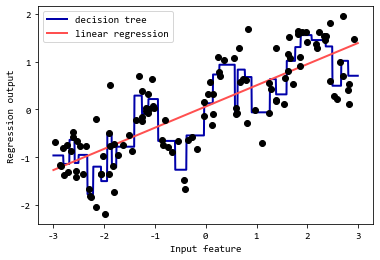

In [2]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor

X, y = mglearn.datasets.make_wave(n_samples=120)
line = np.linspace(-3, 3, 1000, endpoint=False).reshape(-1, 1)

reg = DecisionTreeRegressor(min_samples_leaf=3).fit(X, y)
plt.plot(line, reg.predict(line), label="decision tree")

reg = LinearRegression().fit(X, y)
plt.plot(line, reg.predict(line), label="linear regression")

plt.plot(X[:, 0], y, 'o', c='k')
plt.ylabel("Regression output")
plt.xlabel("Input feature")
plt.legend(loc="best")

In [3]:
from sklearn.preprocessing import KBinsDiscretizer

In [4]:
kb = KBinsDiscretizer(n_bins=10, strategy='uniform')
kb.fit(X)
print("bin edges: \n", kb.bin_edges_)

bin edges: 
 [array([-2.967, -2.378, -1.789, -1.2  , -0.612, -0.023,  0.566,  1.155,  1.744,  2.333,  2.921])]


In [5]:
X_binned = kb.transform(X)
X_binned

<120x10 sparse matrix of type '<class 'numpy.float64'>'
	with 120 stored elements in Compressed Sparse Row format>

In [6]:
print("封箱前的前十条数据：\n", X[:10])
print("封箱后的前十条数据：\n", X_binned[:10])
print("封箱后的前十条数据转化为数组：\n", X_binned[:10].toarray())

封箱前的前十条数据：
 [[-0.753]
 [ 2.704]
 [ 1.392]
 [ 0.592]
 [-2.064]
 [-2.064]
 [-2.651]
 [ 2.197]
 [ 0.607]
 [ 1.248]]
封箱后的前十条数据：
   (0, 3)	1.0
  (1, 9)	1.0
  (2, 7)	1.0
  (3, 6)	1.0
  (4, 1)	1.0
  (5, 1)	1.0
  (6, 0)	1.0
  (7, 8)	1.0
  (8, 6)	1.0
  (9, 7)	1.0
封箱后的前十条数据转化为数组：
 [[0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]]


In [7]:
kb = KBinsDiscretizer(n_bins=10, strategy='uniform', encode='onehot-dense')
kb.fit(X)
X_binned = kb.transform(X)

Text(0.5, 0, 'Input feature')

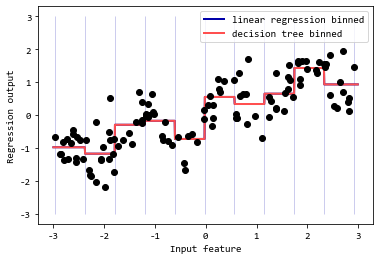

In [8]:
line_binned = kb.transform(line)

reg = LinearRegression().fit(X_binned, y)
plt.plot(line, reg.predict(line_binned), label='linear regression binned')

reg = DecisionTreeRegressor(min_samples_split=3).fit(X_binned, y)
plt.plot(line, reg.predict(line_binned), label='decision tree binned')
plt.plot(X[:, 0], y, 'o', c='k')
plt.vlines(kb.bin_edges_[0], -3, 3, linewidth=1, alpha=.2)
plt.legend(loc="best")
plt.ylabel("Regression output")
plt.xlabel("Input feature")